In [48]:
import numpy as np
import os
from PIL import Image

path1 = "./precision_recall/test_label/"
path2 = "./precision_recall/test_pred/"

files1 = os.listdir(path1)
files1.sort()

files2 = os.listdir(path2)
files2.sort()

l = len(files1)
i = 0

pred = []
label = []

for file1, file2 in zip(files1, files2):
    print file1, file2
    img = Image.open(path1+file1)
    img1 = np.array(img)
    img1[img1>0] = 1
    label.append(img1.flatten())
    img0 = Image.open(path2+file2)
    img2 = np.array(img0)
    pred.append(img2.flatten())
    
    assert len(pred) == len(label)
    
    i = i+1
    
    if i>l:
        break
        
p = np.hstack(pred)
l = np.hstack(label)

assert len(p) == len(l)

s140.tif out_sample3_output_0-1-0001.tif
s141.tif out_sample3_output_0-1-0002.tif
s142.tif out_sample3_output_0-1-0003.tif
s143.tif out_sample3_output_0-1-0004.tif
s144.tif out_sample3_output_0-1-0005.tif
s145.tif out_sample3_output_0-1-0006.tif
s146.tif out_sample3_output_0-1-0007.tif
s147.tif out_sample3_output_0-1-0008.tif
s148.tif out_sample3_output_0-1-0009.tif
s149.tif out_sample3_output_0-1-0010.tif
s150.tif out_sample3_output_0-1-0011.tif
s151.tif out_sample3_output_0-1-0012.tif
s152.tif out_sample3_output_0-1-0013.tif
s153.tif out_sample3_output_0-1-0014.tif
s154.tif out_sample3_output_0-1-0015.tif
s155.tif out_sample3_output_0-1-0016.tif
s156.tif out_sample3_output_0-1-0017.tif
s157.tif out_sample3_output_0-1-0018.tif


In [49]:
class precision_recall(object):
    """to calculate precision and recall given two flattened arrays of images and threshold"""
    
    def __init__(self, pred, label, threshold):
        """initialization"""
        self.pred = pred
        self.label = label
        self.threshold = threshold
        self.pred_t = np.zeros(len(pred), dtype = np.uint8)
        self.pred_t[pred>threshold] = 1
        self.TP = sum (self.pred_t*self.label)
        
    def precision(self):
        """calculate precision"""
        self.FP = sum (self.pred_t*(1-self.label))
        self.p = float(self.TP)/(self.TP+self.FP)
        return self.p
    
    def recall(self):
        """calculate precision"""
        self.FN = sum ((1-self.pred_t)*self.label)
        self.r = float(self.TP)/(self.TP+self.FN)
        return self.r
        

In [50]:
a = precision_recall(pred = p, label = l, threshold = 0.5)

In [51]:
a.precision()

0.7026446975030545

In [52]:
a.recall()

0.9179732709473957

In [56]:
"""Try different threshold values and plot the precision recall curve"""

t = np.linspace(0.1, 0.9, num = 9)
print ("Thresholds:"), t

precision = []
recall = []

for th in t:
    b = precision_recall(pred = p, label = l, threshold = th)
    precision.append(b.precision())
    recall.append(b.recall())
    

Thresholds: [ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]


In [57]:
precision

[0.47249965384234993,
 0.5477984561434832,
 0.6056789303318115,
 0.6560147602326777,
 0.7026446975030545,
 0.7468991924552822,
 0.7905257339300182,
 0.8357656059439463,
 0.8856478194233793]

In [58]:
recall

[0.985252083128822,
 0.9718875568266654,
 0.9566851091245209,
 0.9388750898131474,
 0.9179732709473957,
 0.893208352478348,
 0.8612097119462416,
 0.8157360058536312,
 0.7336284346568622]

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

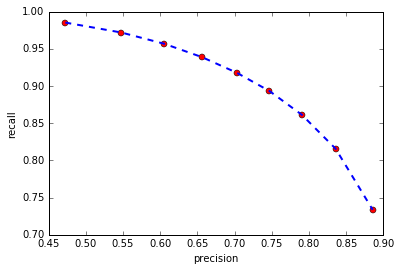

In [66]:
plt.plot(precision, recall, 'ro')
plt.plot(precision, recall, '--', linewidth=2)
plt.xlabel('precision')
plt.ylabel('recall')
plt.show()